Expected Threat (xT) Model for AFL

In [1]:
import pandas as pd
import numpy as np
from mplfooty.pitch import Pitch
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
from highlight_text import fig_text

import sys
sys.path.append("..")
from config import chain_file_path, shots_file_path

import os
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
import matplotlib.font_manager as fm

font_path = "/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/fonts"
for x in os.listdir(font_path):
    if x != ".DS_Store":
        for y in os.listdir(f"{font_path}/{x}"):
            if y.split(".")[-1] == "ttf":
                fm.fontManager.addfont(f"{font_path}/{x}/{y}")
                try:
                    fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
                except Exception:
                    continue
plt.style.use("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/mplstyle/dark_theme.mplstyle")

Load Data

In [3]:
chains = pd.read_csv(chain_file_path)
chains.tail()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Season
1169201,252,ballUp,turnover,1984.0,4,1937,1942.0,St Kilda,St Kilda,Dan Butler,Dan_Butler,Kick,-65.0,14.0,clanger,NaN,NaN,129,160,St Kilda,North Melbourne,left,202319_StKilda_NorthMelbourne,202319,NaN,2023.0
1169202,252,ballUp,turnover,1985.0,4,1937,1945.0,St Kilda,St Kilda,Dan Butler,Dan_Butler,Out On Full After Kick,-69.0,34.0,NaN,NaN,NaN,129,160,St Kilda,North Melbourne,left,202319_StKilda_NorthMelbourne,202319,NaN,2023.0
1169203,253,possGain,behind,1986.0,4,1949,1949.0,North Melbourne,North Melbourne,Luke Davies-Uniacke,Luke_Davies-Uniacke,OOF Kick In,67.0,-34.0,NaN,NaN,NaN,129,160,St Kilda,North Melbourne,left,202319_StKilda_NorthMelbourne,202319,NaN,2023.0
1169204,253,possGain,behind,1987.0,4,1949,1976.0,North Melbourne,North Melbourne,Luke Davies-Uniacke,Luke_Davies-Uniacke,Kick,67.0,-34.0,ineffective,True,NaN,129,160,St Kilda,North Melbourne,left,202319_StKilda_NorthMelbourne,202319,NaN,2023.0
1169205,253,possGain,behind,1988.0,4,1949,1978.0,North Melbourne,North Melbourne,Luke Davies-Uniacke,Luke_Davies-Uniacke,Behind,67.0,-34.0,NaN,NaN,missLeft,129,160,St Kilda,North Melbourne,left,202319_StKilda_NorthMelbourne,202319,NaN,2023.0


In [4]:
shots = pd.read_csv(shots_file_path)
shots.tail()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Season,Goal,Behind,Miss,Score,Home_Score,Away_Score,Home_Current_Score,Away_Current_Score,Current_Margin,Event_Type0,Event_Type1,Event_Type2,Event_Type3,x0,x1,x2,x3,y0,y1,y2,y3,Quarter_Duration0,Quarter_Duration1,Quarter_Duration2,Quarter_Duration3,Chain_Duration,Time_Since_Last_Action,Distance_Since_Last_Action,Distance_to_Right_Goal_x,Distance_to_Middle_y,Distance_to_Middle_Goal,Angle_to_Middle_Goal,Angle_to_Middle_Goal_degrees,Visible_Goal_Angle,Visible_Goal_Angle_degrees,Visible_Behind_Angle,Visible_Behind_Angle_degrees,Squared_Distance_to_Middle_Goal,Log_Distance_to_Middle_Goal,Set_Shot,GoalTrainingSet,GoalTestSet,GoalValidationSet,BehindTrainingSet,BehindTestSet,BehindValidationSet,MissTrainingSet,MissTestSet,MissValidationSet,ballUp,centreBounce,kickIn,possGain,throwIn,xGoals,xBehinds,xMiss,xGoals_normalised,xBehinds_normalised,xMiss_normalised,xScore
28219,226,possGain,goal,1812.0,4,1101,1141.0,North Melbourne,North Melbourne,Jack Ziebell,Jack_Ziebell,Kick,52.0,17.0,effective,True,NaN,129,160,St Kilda,North Melbourne,left,202319_StKilda_NorthMelbourne,202319,NaN,2023.0,1,0,0,6,0,6,52.0,54.0,-2.0,Kick,Uncontested Mark,Kick,Hard Ball Get,52.0,57.0,57.0,57.0,17.0,12.0,39.0,39.0,1141.0,1105.0,1103.0,1101.0,40.0,36.0,7.071068,28.0,17.0,32.756679,0.545655,31.263732,0.168618,9.661075,0.548102,31.403910,784.0,3.332205,True,True,False,False,True,False,False,False,False,True,0,0,0,1,0,0.628677,0.398786,0.013314,0.604046,0.383161,0.012792,4.007439
28220,230,possGain,miss,1843.0,4,1242,1315.0,St Kilda,St Kilda,Jack Higgins,Jack_Higgins,Kick,65.0,-13.0,ineffective,True,NaN,129,160,St Kilda,North Melbourne,left,202319_StKilda_NorthMelbourne,202319,NaN,2023.0,0,0,1,0,0,0,52.0,60.0,-8.0,Kick,Loose Ball Get Crumb,Kick,Mark On Lead,65.0,64.0,53.0,59.0,-13.0,-10.0,-45.0,-35.0,1315.0,1312.0,1308.0,1277.0,73.0,3.0,3.162278,15.0,13.0,19.849433,0.714091,40.914383,0.250156,14.332903,0.954148,54.668647,225.0,2.708050,False,False,False,True,True,False,False,True,False,False,0,0,0,1,0,0.490412,0.329002,0.194007,0.483918,0.324645,0.191438,3.228152
28221,242,throwIn,behind,1931.0,4,1590,1597.0,St Kilda,St Kilda,Jack Higgins,Jack_Higgins,Kick,59.0,-24.0,ineffective,True,NaN,129,160,St Kilda,North Melbourne,left,202319_StKilda_NorthMelbourne,202319,NaN,2023.0,0,1,0,1,1,0,52.0,60.0,-8.0,Kick,Handball Received,Handball,Handball Received,59.0,59.0,57.0,57.0,-24.0,-24.0,-27.0,-27.0,1597.0,1596.0,1594.0,1594.0,7.0,1.0,0.000000,21.0,24.0,31.890437,0.851966,48.814075,0.133498,7.648847,0.435967,24.979086,441.0,3.044522,False,True,False,False,False,True,False,False,True,False,0,0,0,0,1,0.246542,0.421199,0.312598,0.251487,0.429647,0.318867,1.938567
28222,244,throwIn,goal,1943.0,4,1631,1641.0,St Kilda,St Kilda,Jack Higgins,Jack_Higgins,Ground Kick,65.0,1.0,effective,True,NaN,129,160,St Kilda,North Melbourne,left,202319_StKilda_NorthMelbourne,202319,NaN,2023.0,1,0,0,6,6,0,53.0,60.0,-7.0,Ground Kick,Handball,Loose Ball Get,Kick Inside 50 Result,65.0,58.0,56.0,57.0,1.0,5.0,6.0,12.0,1641.0,1639.0,1638.0,1635.0,10.0,2.0,8.062258,15.0,1.0,15.033296,0.066568,3.814075,0.444939,25.493117,2.151823,123.290380,225.0,2.708050,False,True,False,False,True,False,False,True,False,False,0,0,0,0,1,0.668933,0.327296,0.093059,0.614101,0.300468,0.085431,3.985076
28223,253,possGain,behind,1987.0,4,1949,1976.0,North Melbourne,North Melbourne,Luke Davies-Uniacke,Luke_Davies-Uniacke,Kick,67.0,-34.0,ineffective,True,NaN,129,160,St Kilda,North Melbourne,left,202319_StKilda_NorthMelbourne,202319,NaN,2023.0,0,1,0,1,0,1,59.0,60.0,-1.0,Kick,OOF Kick In,Out On Full After Kick,Kick,67.0,67.0,-69.0,-65.0,-34.0,-34.0,34.0,14.0,1976.0,1949.0,1945.0,1942.0,27.0,27.0,0.000000,13.0,34.0,36.400549,1.205595,69.075498,0.063

In [5]:
chains = chains.merge(shots[['Chain_Number', 'Order', 'Match_ID', 'Score', 'xScore']], how='left', on=['Chain_Number', 'Order', 'Match_ID'])
chains[['Score', 'xScore']] = chains[['Score', 'xScore']].fillna(0)

Expected Threat Data

In [6]:
xthreat_data = chains.copy()

xthreat_data = xthreat_data.dropna(subset=['Player'])
xthreat_data = xthreat_data[~(xthreat_data['Description']=="Kick Into F50")]
xthreat_data = xthreat_data[~(xthreat_data['Description']=="Goal")]

xthreat_data['end_x'] = xthreat_data.groupby('Match_ID')['x'].shift(-1).fillna(0)
xthreat_data['end_y'] = xthreat_data.groupby('Match_ID')['y'].shift(-1).fillna(0)

xthreat_data['type_name'] = np.where(xthreat_data['Description'] == "Handball", "Handball",
                                     np.where((xthreat_data['Description'] == 'Kick') & (xthreat_data['Shot_At_Goal']==True), "Shot",
                                               np.where(xthreat_data['Description']=='Kick', "Kick",
                                                        "Carry")))
xthreat_data['outcome_name'] = (xthreat_data['type_name'] == "Carry") | (xthreat_data['Disposal'] == "effective")
xthreat_data['goal'] = (xthreat_data['type_name'] == "Shot") & (xthreat_data['Final_State'] == "goal")
xthreat_data['shoot'] = xthreat_data['type_name'] == "Shot"
xthreat_data['move'] = xthreat_data['type_name'] != "Shot"

xthreat_data['Year'] = xthreat_data['Match_ID'].apply(lambda x: int(x[:4]))
xthreat_data = xthreat_data[['Match_ID', 'Year', 'Team', 'Player', 'type_name', 'outcome_name', 'x', 'y', 'end_x', 'end_y', 'xScore', 'goal', 'shoot', 'move']]

xthreat_data.head(5)

,Match_ID,Year,Team,Player,type_name,outcome_name,x,y,end_x,end_y,xScore,goal,shoot,move
1,202101_BrisbaneLions_Sydney,2021,Brisbane Lions,Dayne Zorko,Carry,True,8.0,-5.0,9.0,-6.0,0.0,False,False,True
2,202101_BrisbaneLions_Sydney,2021,Brisbane Lions,Dayne Zorko,Handball,False,9.0,-6.0,11.0,-7.0,0.0,False,False,True
3,202101_BrisbaneLions_Sydney,2021,Sydney,Oliver Florent,Carry,True,11.0,-7.0,12.0,-5.0,0.0,False,False,True
4,202101_BrisbaneLions_Sydney,2021,Sydney,Oliver Florent,Handball,True,12.0,-5.0,14.0,-2.0,0.0,False,False,True
5,202101_BrisbaneLions_Sydney,2021,Sydney,George Hewett,Carry,True,14.0,-2.0,22.0,-2.0,0.0,False,False,True


Bin the Data

In [7]:
pitch = Pitch(pitch_width=135, pitch_length=165, line_zorder=2,
              line_colour="white", pitch_colour="#121212", 
              line_width=0.5)
bins = (40, 32)

In [8]:
shot_probability = pitch.bin_statistic(xthreat_data['x'], xthreat_data['y'], values=xthreat_data['shoot'],
                                       statistic='mean', bins=bins)
move_probability = pitch.bin_statistic(xthreat_data['x'], xthreat_data['y'], values=xthreat_data['move'],
                                       statistic='mean', bins=bins)
goal_probability = pitch.bin_statistic(xthreat_data.loc[xthreat_data['shoot'], 'x'],
                                       xthreat_data.loc[xthreat_data['shoot'], 'y'], 
                                       values=xthreat_data.loc[xthreat_data['shoot'], 'goal'],
                                       statistic='mean', bins=bins)

Plot Shot Probability

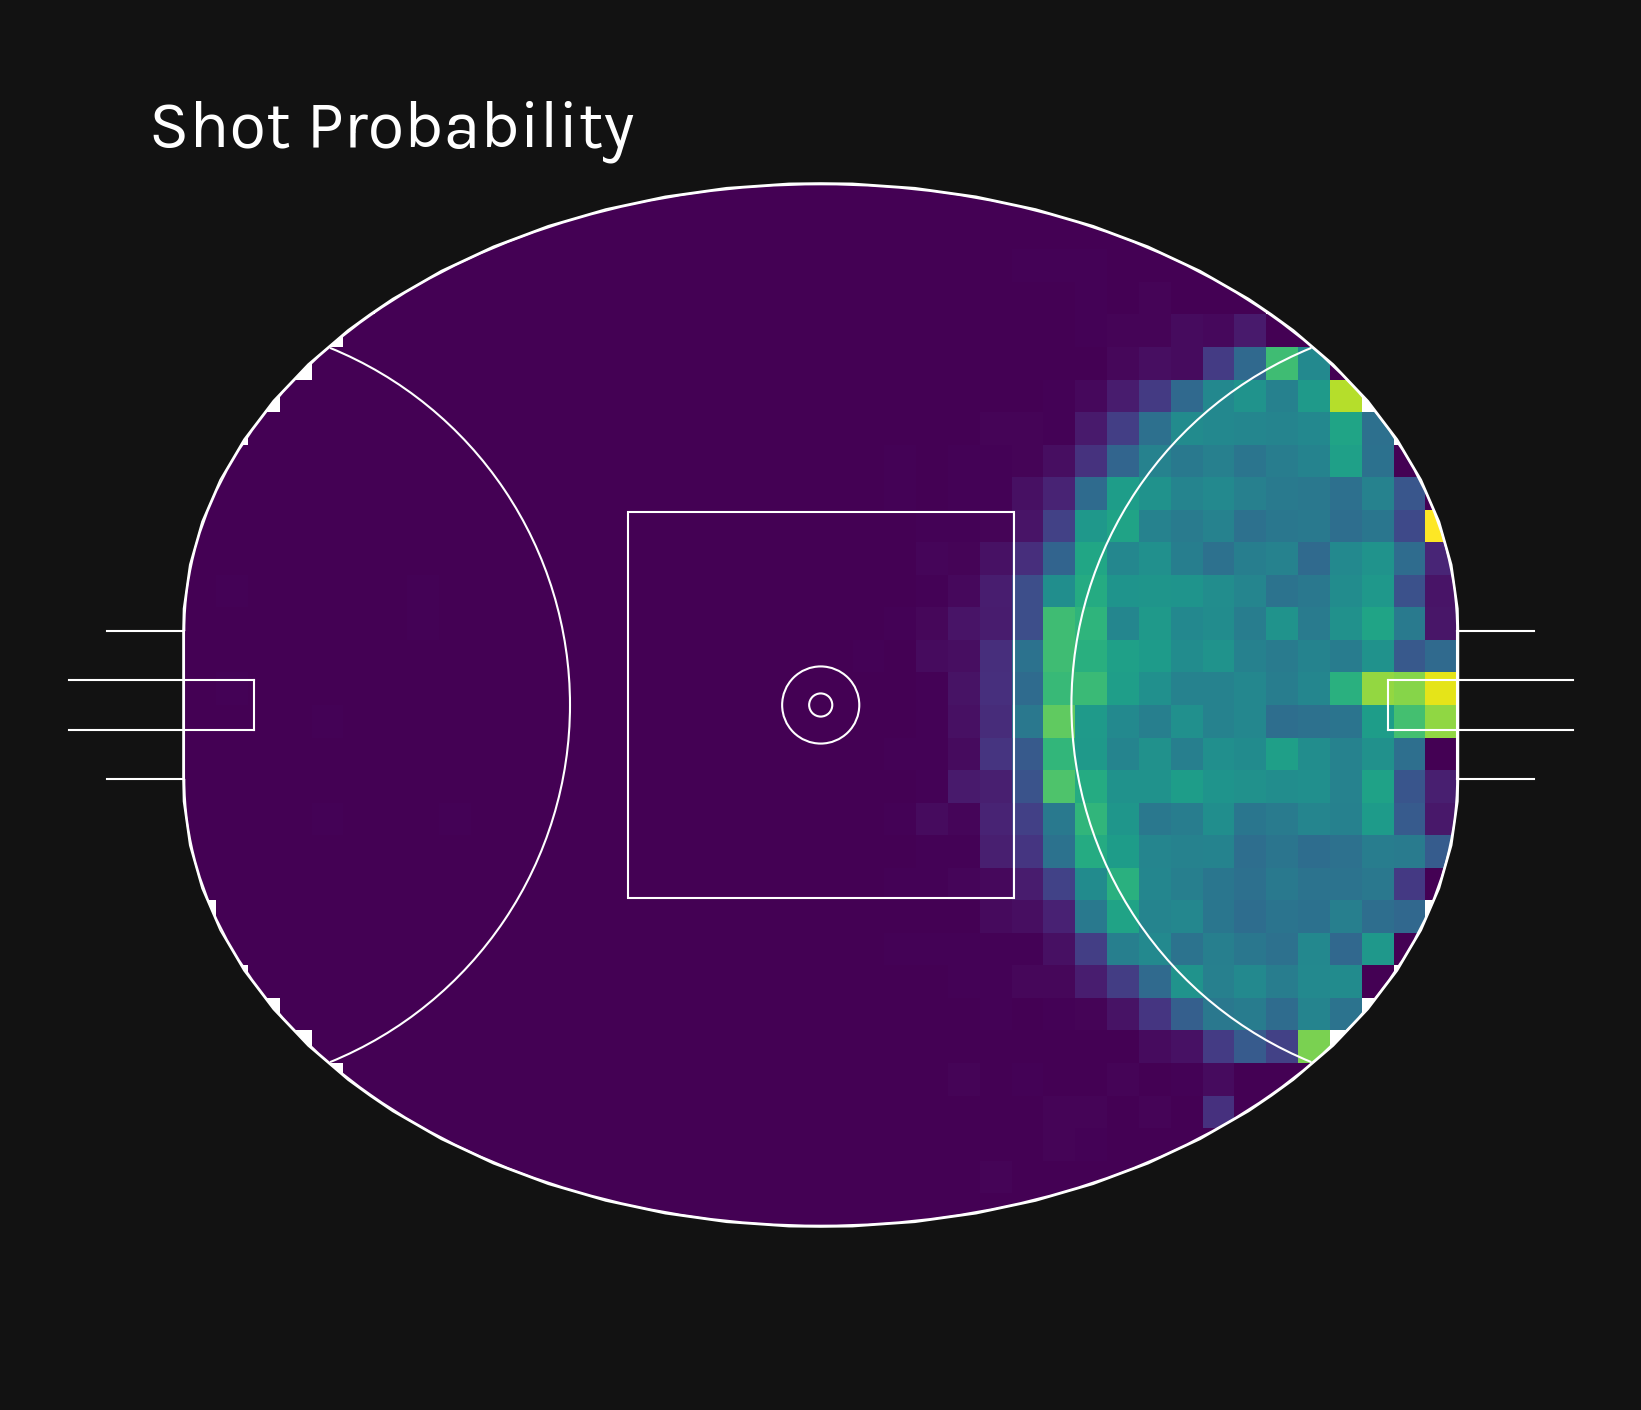

In [10]:
fig, ax = pitch.draw()
fig.dpi = 300
shot_heatmap = pitch.heatmap(shot_probability, ax=ax)
fig_text(0.15, 0.92, s="Shot Probability", font="Karla", fontsize=16)

plt.savefig(
	"figures/20230729_shot_probability.png",
	dpi = 300,
	facecolor = "#121212",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

Plot move probability

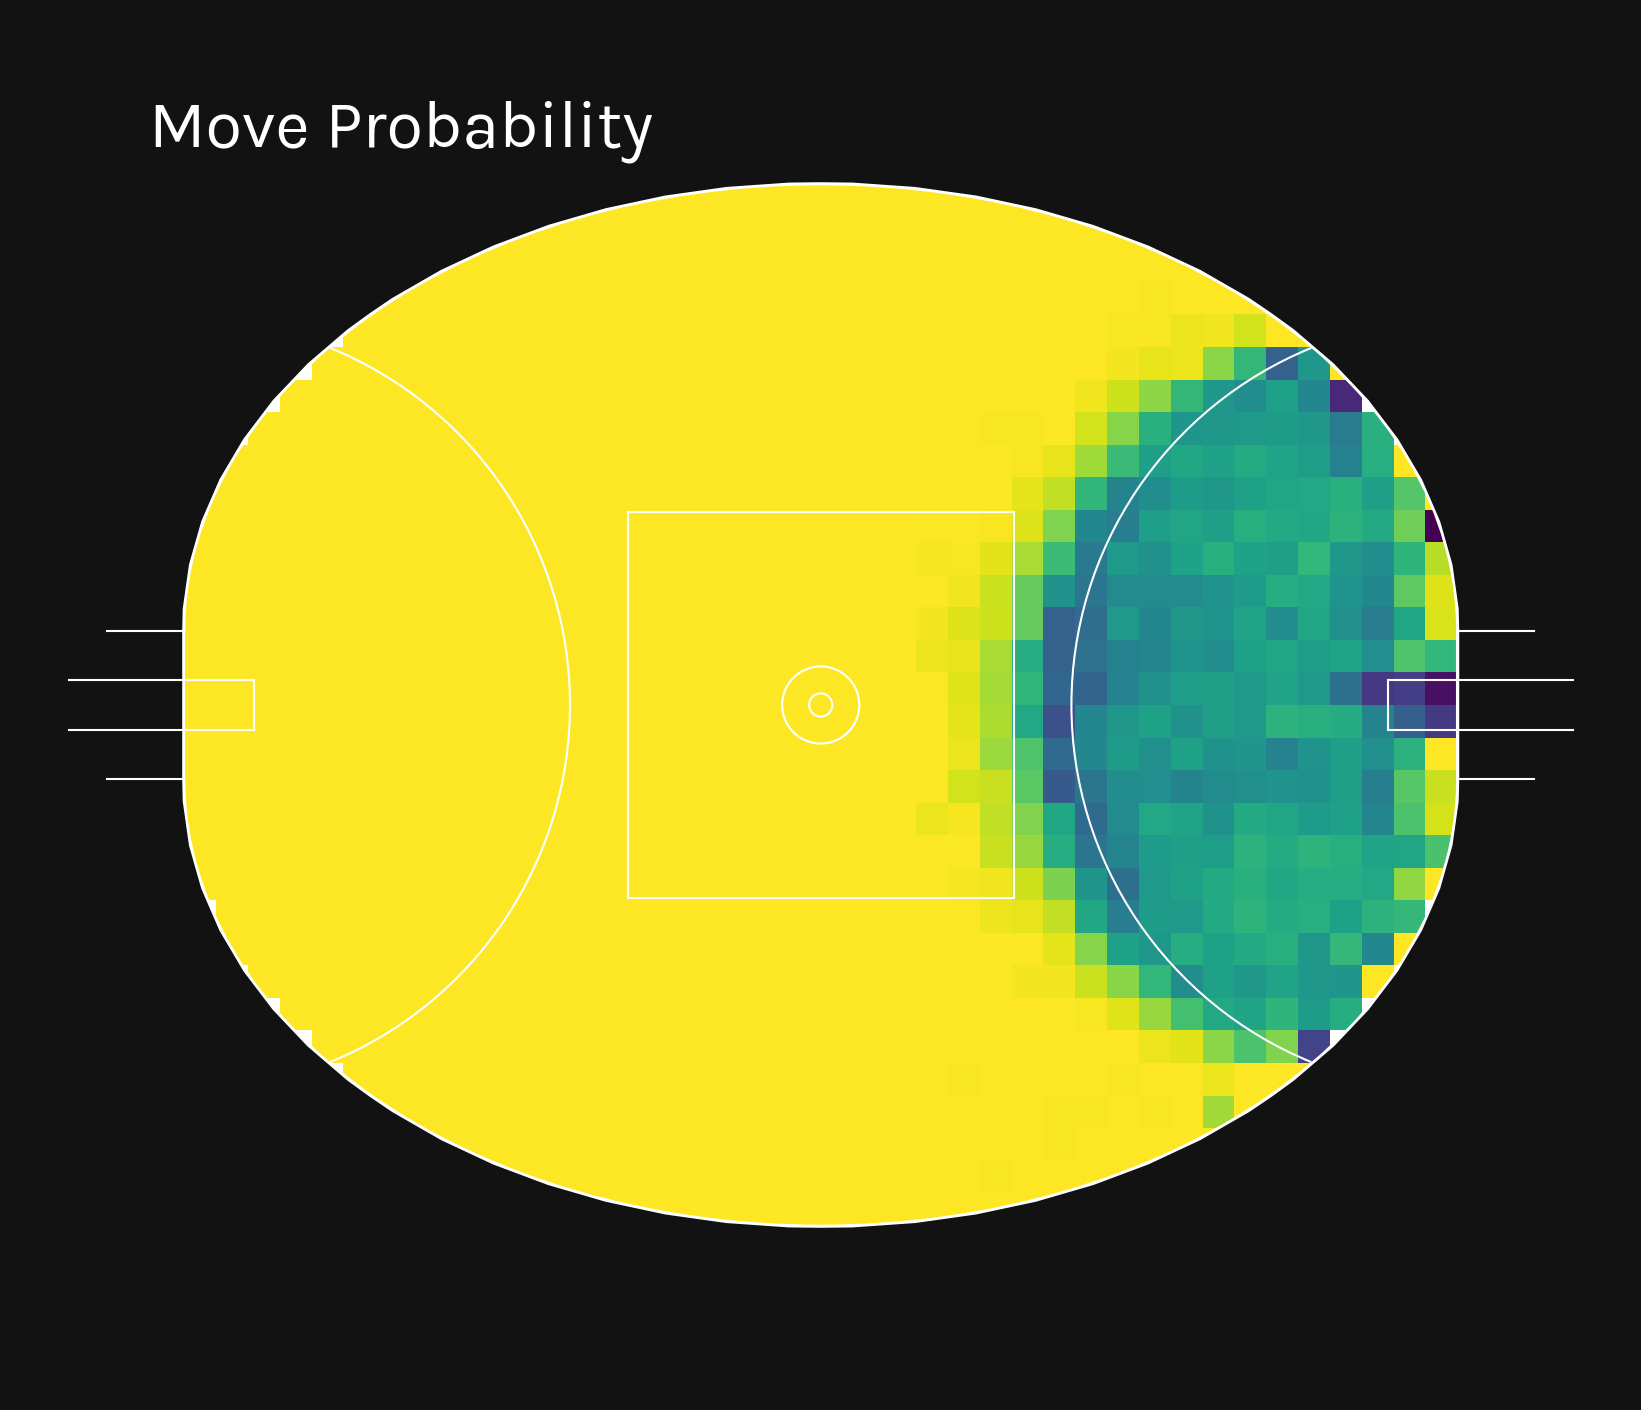

In [11]:
fig, ax = pitch.draw()
fig.dpi = 300
move_heatmap = pitch.heatmap(move_probability, ax=ax)

fig_text(0.15, 0.92, s="Move Probability", font="Karla", fontsize=16)

plt.savefig(
	"figures/20230729_move_probability.png",
	dpi = 300,
	facecolor = "#121212",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

Plot goal probability

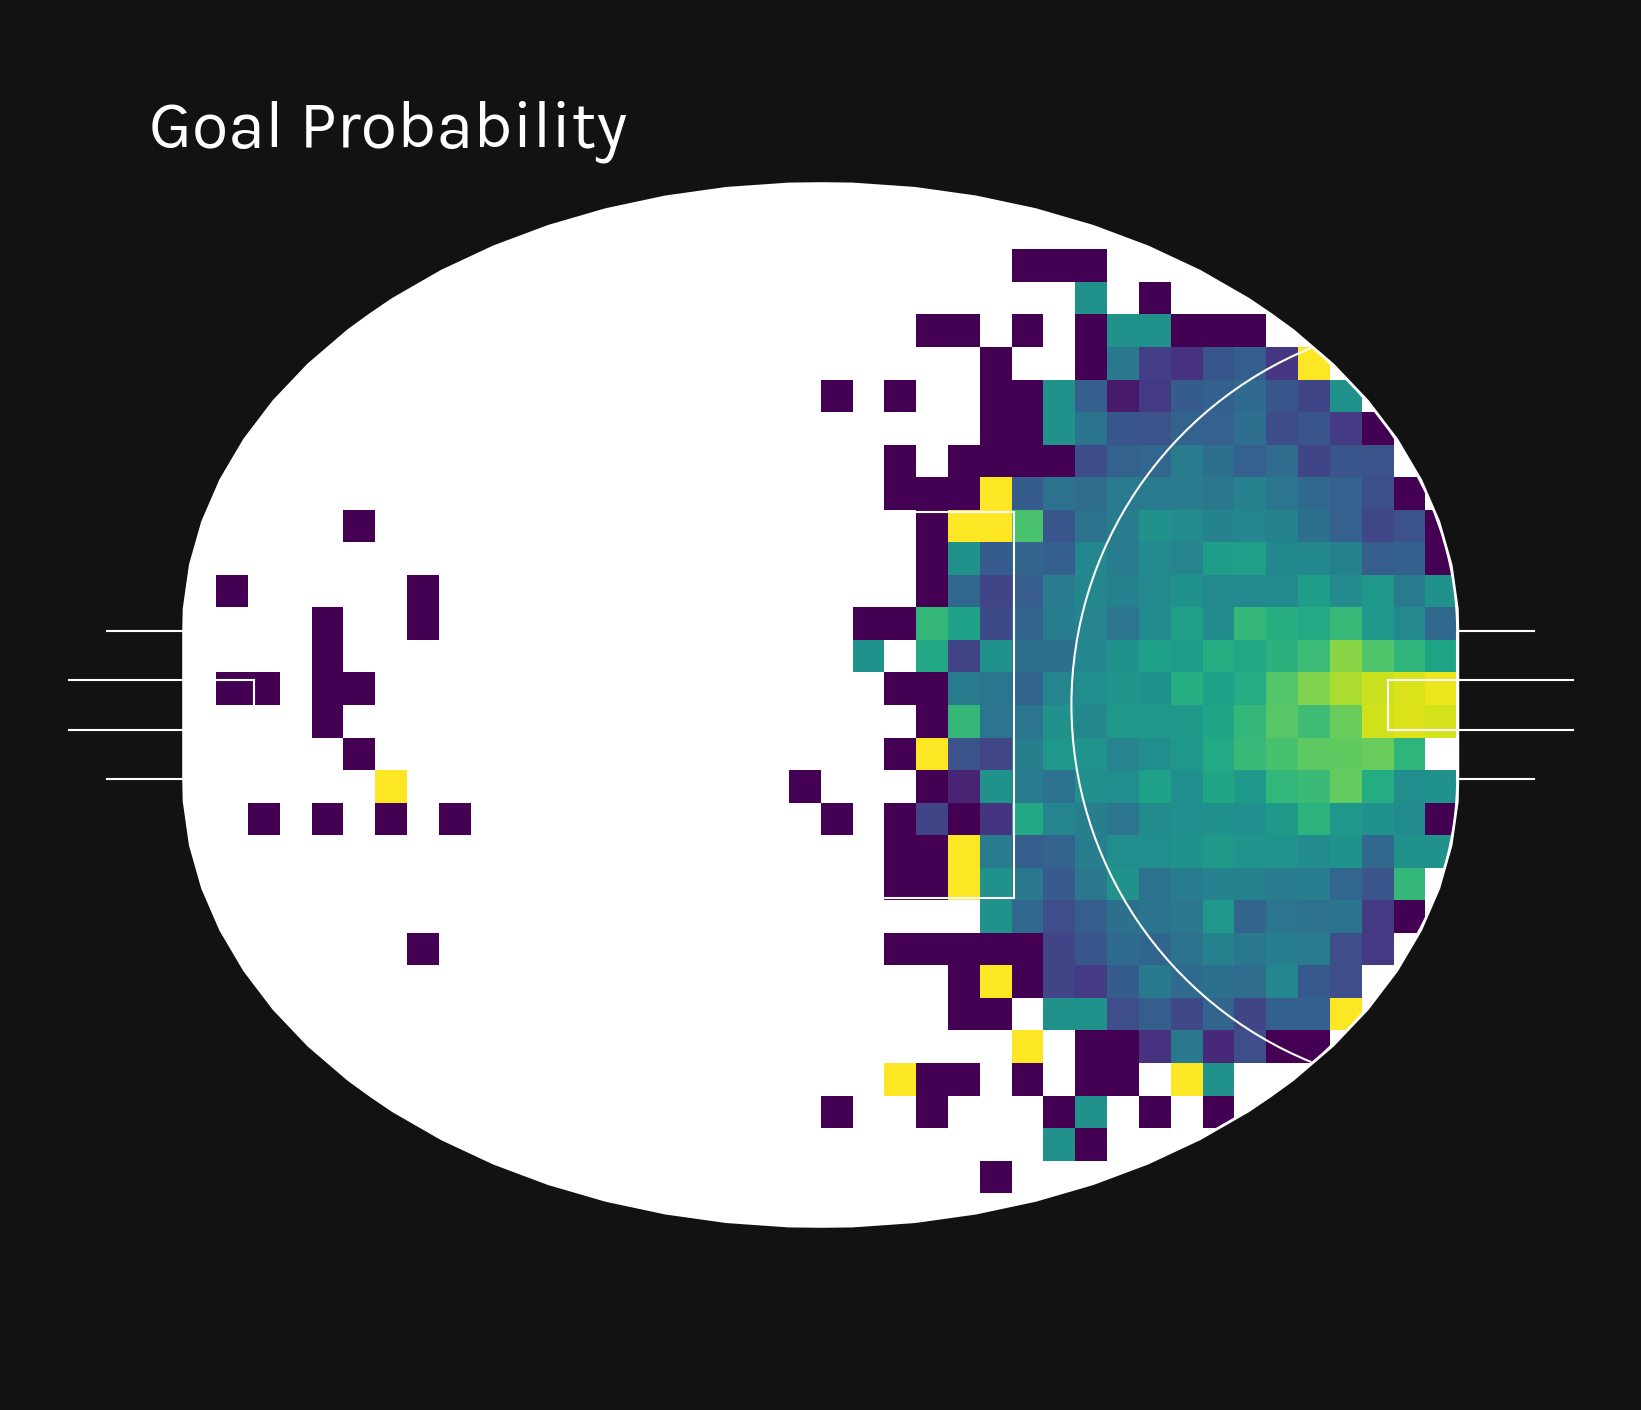

In [14]:
fig, ax = pitch.draw()
fig.dpi = 300
goal_heatmap = pitch.heatmap(goal_probability, ax=ax)

fig_text(0.15, 0.92, s="Goal Probability", font="Karla", fontsize=16)

plt.savefig(
	"figures/20230729_goal_probability.png",
	dpi = 300,
	facecolor = "#121212",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

Calculate the move transition matrix

In [15]:
# Get a data frame of move events and filter it so only contains actions inside the pitch
move = xthreat_data[xthreat_data['move']].copy()
bin_start_locations = pitch.bin_statistic(move['x'], move['y'], bins=bins)
move = move[bin_start_locations['inside']].copy()

# get successful moves
bin_end_locations = pitch.bin_statistic(move['end_x'], move['end_y'], bins=bins)
move_success = move[(bin_end_locations['inside']) & (move['outcome_name'] == True)].copy()

# get a dataframe of successful moves and the grid cells they start/end in
bin_success_start = pitch.bin_statistic(move_success['x'], move_success['y'], bins=bins)
bin_success_end = pitch.bin_statistic(move_success['end_x'], move_success['end_y'], bins = bins)
df_bin = pd.DataFrame({
    'x': bin_success_start['binnumber'][0],
    'y': bin_success_start['binnumber'][1],
    'end_x': bin_success_end['binnumber'][0],
    'end_y': bin_success_end['binnumber'][1]
})

# calculate the bin counts for successful moves (number of moves between grid cells)
bin_counts = df_bin.value_counts().reset_index(name='bin_counts')
# create the move_transition_matrix of shape (num_y_bins, num_x_bins, num_y_bins, num_x_bins)
# this is the number of successful moves between grid cells
num_y, num_x = shot_probability['statistic'].shape
move_transition_matrix = np.zeros((num_y, num_x, num_y, num_x))
move_transition_matrix[bin_counts['y'], bin_counts['x'], bin_counts['end_y'], bin_counts['end_x']] = bin_counts['bin_counts'].values

# and divide by the starting locations for all moves to get probability of moving ball successfully
bin_start_locations = pitch.bin_statistic(move['x'], move['y'], bins=bins)
bin_start_locations = np.expand_dims(bin_start_locations['statistic'], (2, 3))
move_transition_matrix = np.divide(move_transition_matrix, bin_start_locations, out=np.zeros_like(move_transition_matrix), where=bin_start_locations != 0)


Get the matrices

In [16]:
move_transition_matrix = np.nan_to_num(move_transition_matrix)
shot_probability_matrix = np.nan_to_num(shot_probability['statistic'])
move_probability_matrix = np.nan_to_num(move_probability['statistic'])
goal_probability_matrix = np.nan_to_num(goal_probability['statistic'])

Calculate xT

In [17]:
xT = np.multiply(shot_probability_matrix, goal_probability_matrix)
diff=1
iteration=0
while np.any(diff > 0.00001): # iterate until the differences are small
    xT_copy = xT.copy()
    # Calculate the new expected threat
    xT = (np.multiply(shot_probability_matrix, goal_probability_matrix) + 
          np.multiply(move_probability_matrix, 
                      np.multiply(move_transition_matrix, np.expand_dims(xT, axis=(0, 1))).sum(axis=(2,3))))
    diff = (xT - xT_copy)
    iteration += 1
print('Number of iterations: ', iteration)

Number of iterations:  61


Plot xT grid

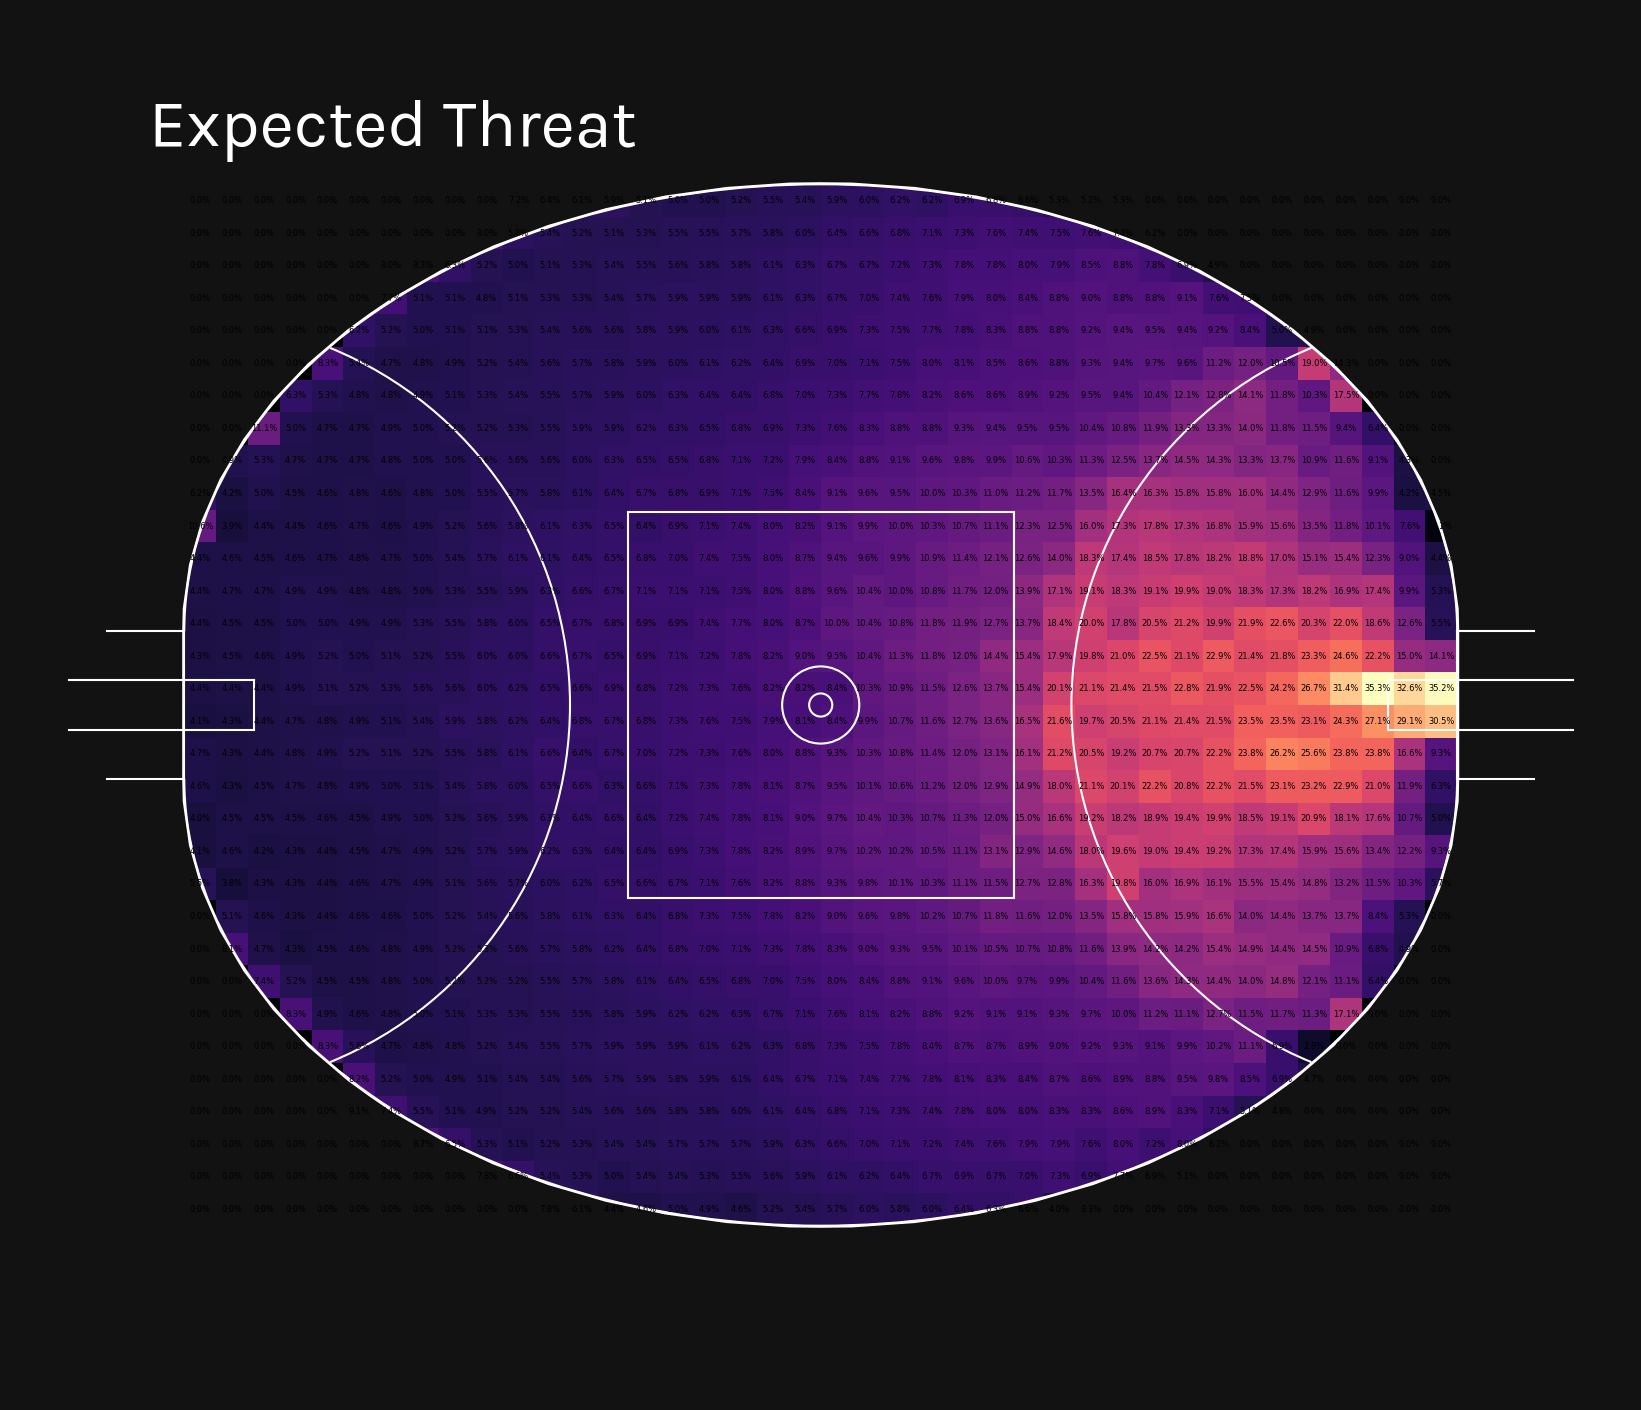

In [18]:
path_eff = [path_effects.Stroke(linewidth=1.5, foreground="black"),
            path_effects.Normal()]
# new bin statistic for plotting only
for_plotting = pitch.bin_statistic(xthreat_data['x'], xthreat_data['y'], bins=bins)
for_plotting['statistic'] = xT
fig, ax = pitch.draw()
fig.dpi = 300
heatmap = pitch.heatmap(for_plotting, ax=ax, cmap = "magma")
label_heatmap = pitch.label_heatmap(for_plotting, ax=ax, str_format='{:.1%}', color="black", fontsize=2, va="center", ha="center")

fig_text(0.15, 0.92, s="Expected Threat", font="Karla", fontsize=16)

plt.savefig(
	"figures/20230729_expected_threat.png",
	dpi = 300,
	facecolor = "#121212",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

Scoring Events

In [ ]:
# Get grid start ad end cells
grid_start = pitch.bin_statistic(move_success['x'], move_success['y'], bins=bins)
grid_end = pitch.bin_statistic(move_success['end_x'], move_success['end_y'], bins=bins)

# Then xT values from start and end grid cell
start_xT = xT[grid_start['binnumber'][1], grid_start['binnumber'][0]]
end_xT = xT[grid_end['binnumber'][1], grid_end['binnumber'][0]]

# calculate added xT
added_xT = end_xT - start_xT
move_success['xT'] = added_xT

In [ ]:
move_success.head()

Chain data filters

In [ ]:
def split_threat_data(threat):
    
    kick_threat = threat[threat['type_name'] == "Kick"]
    pass_threat = threat[threat['type_name'] == "Handball"]
    carry_threat = threat[threat['type_name'] == "Carry"]
    
    return kick_threat, pass_threat, carry_threat

In [ ]:
threat = move_success.copy()
kick_threat, pass_threat, carry_threat = split_threat_data(threat)

threat_2021 = threat[threat['Year'] == 2021]
kick_threat_2021, pass_threat_2021, carry_threat_2021 = split_threat_data(threat_2021)
threat_2022 = threat[threat['Year'] == 2022]
kick_threat_2022, pass_threat_2022, carry_threat_2022 = split_threat_data(threat_2022)
threat_2023 = threat[threat['Year'] == 2023]
kick_threat_2023, pass_threat_2023, carry_threat_2023 = split_threat_data(threat_2023)


Expected Threat Total

In [ ]:
def get_total_by_player(threat, top_n=10):
    
    return threat.groupby('Player')['xT'].sum().sort_values(ascending=False).head(top_n)

**Interpretation**: These are the top players whose actions created the highest cumulative change in xT. These are the players who have increased the likelihood of their team scoring in the next few actions the most across the specified dataset.

In [ ]:
get_total_by_player(threat, top_n=10)

In [ ]:
get_total_by_player(threat_2021, top_n=10)

In [ ]:
get_total_by_player(threat_2022, top_n=10)

In [ ]:
get_total_by_player(threat_2023, top_n=10)

Kicks

In [ ]:
get_total_by_player(kick_threat, top_n=10)

In [ ]:
get_total_by_player(kick_threat_2021, top_n=10)

In [ ]:
get_total_by_player(kick_threat_2022, top_n=10)

In [ ]:
get_total_by_player(kick_threat_2023, top_n=10)

Handball

In [ ]:
get_total_by_player(pass_threat)

In [ ]:
get_total_by_player(pass_threat_2021)

In [ ]:
get_total_by_player(pass_threat_2022)

In [ ]:
get_total_by_player(pass_threat_2023)

Carry

In [ ]:
get_total_by_player(carry_threat)

In [ ]:
get_total_by_player(carry_threat_2021)

In [ ]:
get_total_by_player(carry_threat_2022)

In [ ]:
get_total_by_player(carry_threat_2023)

Player Profile

In [ ]:
def get_player_threat(threat, player):
    
    player = threat[threat['Player'] == player]
    return player.groupby('type_name')['xT'].sum()

In [ ]:
get_player_threat(threat, "Christian Petracca")

In [ ]:
get_player_threat(threat_2021, "Christian Petracca")

In [ ]:
get_player_threat(threat_2022, "Christian Petracca")

In [ ]:
get_player_threat(threat_2023, "Christian Petracca")

Expected Threat per Game

In [ ]:
def get_threat_per_game_by_player(threat, top_n=10, min_games = 0):
    
    average_xT = threat.groupby('Player').agg(
        xT = ('xT', 'sum'),
        games = ('Match_ID', 'nunique'))
    average_xT['xTperGame'] = average_xT['xT'] / average_xT['games']
    average_xT = average_xT[average_xT['games'] > min_games]
    average_xT = average_xT.sort_values(by = 'xTperGame', ascending=False)
    return average_xT.head(top_n)

In [ ]:
get_threat_per_game_by_player(threat, top_n=10, min_games=20)

In [ ]:
get_threat_per_game_by_player(threat_2021, top_n=10, min_games=10)

In [ ]:
get_threat_per_game_by_player(threat_2022, top_n=10, min_games=10)

In [ ]:
get_threat_per_game_by_player(threat_2023, top_n=10, min_games=10)

Expected Threat per Action

In [ ]:
def get_threat_per_action_by_player(threat, top_n=10, min_actions = 0):
    
    average_xT = threat.groupby('Player').agg(
        xT = ('xT', 'sum'),
        actions = ('xT', 'count'))
    average_xT['xTperAction'] = average_xT['xT'] / average_xT['actions']
    average_xT = average_xT[average_xT['actions'] > min_actions]
    average_xT = average_xT.sort_values(by = 'xTperAction', ascending=False)
    return average_xT.head(top_n)

In [ ]:
get_threat_per_action_by_player(threat, top_n=10, min_actions = 1000)

In [ ]:
get_threat_per_action_by_player(threat_2021, top_n=10, min_actions = 500)

In [ ]:
get_threat_per_action_by_player(threat_2022, top_n=10, min_actions = 500)

In [ ]:
get_threat_per_action_by_player(threat_2023, top_n=10, min_actions = 500)